#### Titanic: Machine Learning from Disaster
##### 2021-1 학기, 기계학습 프로그래밍
##### 한국폴리텍대학 대구캠퍼스 AI엔지니어링

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier

##### 학습데이터 로딩

In [3]:
df_train = pd.read_csv("train.csv")
print(df_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


##### 생존사 / 사망자 숫자

In [4]:
# value count로 확인
df_train["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

C:\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


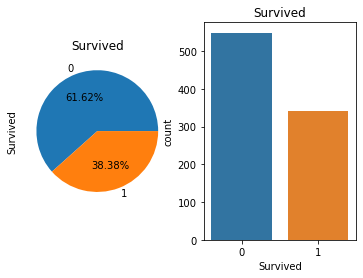

In [5]:
# 파이플롯 / 카운터 플롯으로 시각화
# 그림은 1행 2열
fig, ax = plt.subplots(1,2)

df_train["Survived"].value_counts().plot.pie(autopct='%1.2f%%', ax=ax[0])
ax[0].set_title("Survived")

sns.countplot("Survived", data=df_train,ax=ax[1])
ax[1].set_title("Survived")
plt.show()

##### 각 칼럼들 간의 상관도

In [6]:
df_train.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


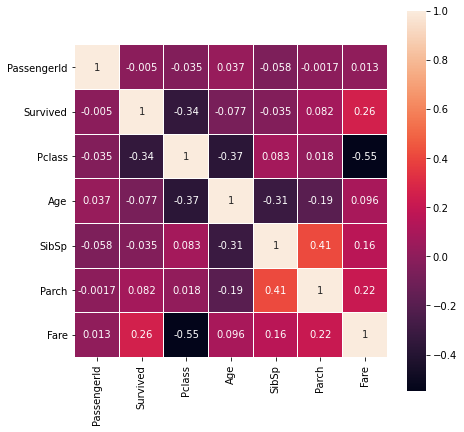

In [7]:
# 상관도 시각화, seaborn의 heatmap 사용
plt.figure(figsize=(7, 7))
sns.heatmap(df_train.corr(), linewidths=0.01, annot=True, square=True)
plt.show()

##### 전체 생존자 대비 칼럼별 생존자 비율
###### ex) 전체 생존자에서의 남녀 비

In [8]:
def show_count_plot (feature):
    sns.countplot(data=df_train, x=feature, hue="Survived")
    plt.show()

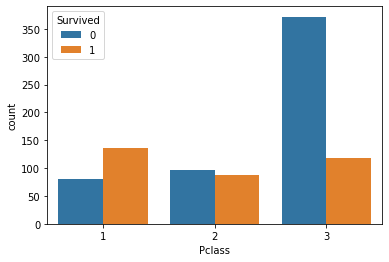

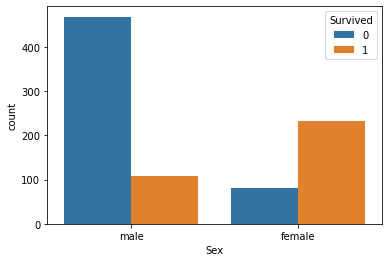

In [9]:
show_count_plot("Pclass")
show_count_plot("Sex")

In [10]:
def show_survive_rate(feature):
    df_survive = df_train.loc[df_train["Survived"] == 1]
    # feature 열의 생존자 수를 카운트 한다.
    sur_info = df_survive[feature].value_counts(sort=False)

    # 전체 생존자 수 대비 category 별 생존 비율
    category = sur_info.index
    plt.title("Survival Rate in Total ({0})".format(feature))
    plt.pie(sur_info, labels=category, autopct="%0.1f%%")
    plt.show()

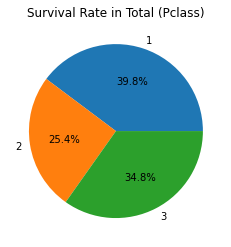

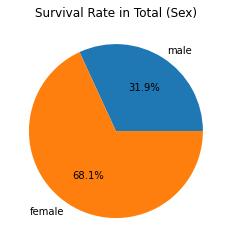

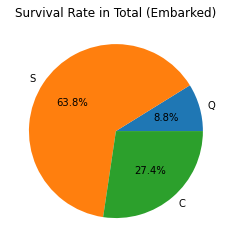

In [11]:
show_survive_rate("Pclass")
show_survive_rate("Sex")
show_survive_rate("Embarked")

##### 모수를 고려한 생존자 비율
###### 예) 여성생존자 / 여성 탑승자

In [12]:
# 생존자와 죽은자의 data frame을 분리 했다.
df_survive = df_train.loc[df_train["Survived"] == 1]
df_dead = df_train.loc[df_train["Survived"] == 1]    

In [15]:
# 각 칼럼의 인원수 대비 생존자 비율
def show_group_rate(feature):
    sur_info = df_survive[feature].value_counts(sort=False)
    dead_info = df_dead[feature].value_counts(sort=False)
    
    fig = plt.figure()
    plt.title("Survival rete of " + feature)
    
    for i, index in enumerate(sur_info.index):
        #print(sur_info)
        fig.add_subplot(1, len(sur_info), i+1)
        plt.pie([sur_info[index], dead_info[index]], labels=["Survived", "Dead"], autopct="%0.1f%%")
        plt.title("Survial rate of " + feature)
        
    plt.show()

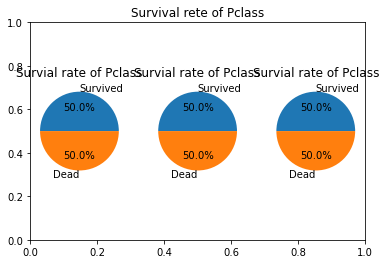

In [16]:
show_group_rate("Pclass")

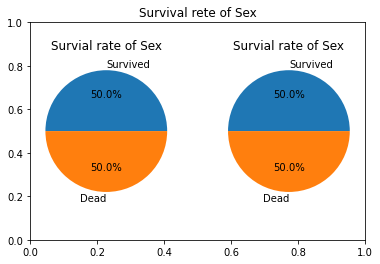

In [17]:
show_group_rate("Sex")

#### 데이터 전처리